In [ ]:
%run "! DEFAULT PLOT THINGIES.ipynb"
%run "../! DEFAULT PLOT THINGIES.ipynb"

Current working directory is now c:\users\deen\dropbox\phd rearrangements\thesis\notebooks\rattler-naar-nul
Populating the interactive namespace from numpy and matplotlib
Total # of packings:  83006
After (1.1):  68835
After (1.2):  62275
After (1.3):  61147
After (2.1):  60232
After (2.2):  59847
(3):
   512 -6.5 skipped (only 7 packings)
   724 -7.0 skipped (only 19 packings)
   1024 -6.83 skipped (only 4 packings)
   1024 -6.67 skipped (only 10 packings)
   1024 -6.5 skipped (only 17 packings)
   1024 -6.33 skipped (only 16 packings)
   4096 -4.0 skipped (only 12 packings)
   4096 -3.0 skipped (only 13 packings)
   4096 -2.0 skipped (only 18 packings)
After (3):  59731


Current working directory is now c:\users\deen\dropbox\phd rearrangements\thesis\notebooks\rattler-naar-nul
Populating the interactive namespace from numpy and matplotlib
Total # of packings:  83006
After (1.1):  68835
After (1.2):  62275
After (1.3):  61147
After (2.1):  60232
After (2.2):  59847
(3):
   512 -6.5 skipped (only 7 packings)
   724 -7.0 skipped (only 19 packings)
   1024 -6.83 skipped (only 4 packings)
   1024 -6.67 skipped (only 10 packings)
   1024 -6.5 skipped (only 17 packings)
   1024 -6.33 skipped (only 16 packings)
   4096 -4.0 skipped (only 12 packings)
   4096 -3.0 skipped (only 13 packings)
   4096 -2.0 skipped (only 18 packings)
After (3):  59731


In [3]:
mask = (dataN == 22) * (datalP == -4.83) * (summ['num'] == 8002)
data = summ[mask][0]

shearfile = tables.File(base + "h5/N22~P1468e-5_shear.h5").root.__iter__().next().__iter__().next()

In [4]:
# packing is 8002
# particles zijn 2 en {4,8,15}

packing_data = shearfile.__getattr__('8002')
packing_data_array = packing_data.SR.data.read()

0.958333333333 1.04166666667


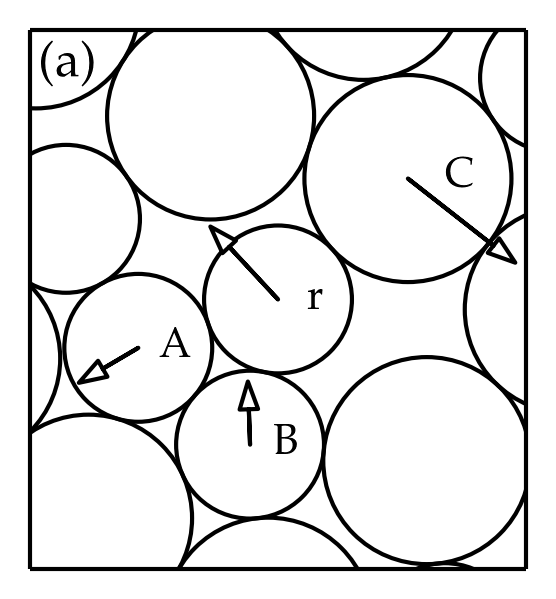

In [10]:
# plot packing met die deeltjes gemarkeerd

from packing_tools import make_shear_graphs as msg

group = packing_data.SR.__getattr__('0000')
packing = dict((x, group._v_attrs[x]) for x in group._v_attrs._v_attrnames)
packing['particles'] = group.particles.read()

aftgroup = packing_data.SR.__getattr__('%04i' % data["i_min"])
aftpacking = dict((x, aftgroup._v_attrs[x]) for x in aftgroup._v_attrs._v_attrnames)
aftpacking['particles'] = aftgroup.particles.read()


halffig()
ax = gca()

msg.plotparticles(packing)
msg.plotparticles(packing, offset=-packing["L2"]) #packing["L1"] * offset_num[0] + pack["L2"] * offset_num[1]))

ctrparticle = packing['particles'][2]
xctr = ctrparticle['x']
yctr = ctrparticle['y']

w = ax.bbox.bounds[2]
h = ax.bbox.bounds[3]
norm = 1/mean([w,h])
w = w * norm
h = h * norm
print w,h

around = 3.5
waround = around*w
haround = around*h
axis(xmin=xctr-waround, xmax=xctr+waround,
     ymin=yctr-haround, ymax=yctr+haround)

for label, particle in zip("rABC", [2,4,8,15]):
    particle = packing['particles'][particle]
    plt.text(particle['x'] + 0.5*particle['r'], particle['y'], label, horizontalalignment="center", verticalalignment="center")
    
plt.xticks([])
plt.yticks([])

# plot directions of particles

xs = []
ys = []
dxs = []
dys = []

for particle in [2,4,8,15]:
    before_particle = packing['particles'][particle]
    after_particle = aftpacking['particles'][particle]
    
    xs.append(before_particle['x'])
    ys.append(before_particle['y'])
    
    dxs.append(after_particle['x'] - before_particle['x'])
    dys.append(after_particle['y'] - before_particle['y'])

xs = np.array(xs)
ys = np.array(ys)
dxs = np.array(dxs)
dys = np.array(dys)

dxs = dxs-np.mean(dxs)
dys = dys-np.mean(dys)

factor = 20000
dxs *= factor
dys *= factor
    
for x,y,dx,dy in zip(xs,ys,dxs,dys):
    arrow(x,y,dx,dy, head_width=0.25, fc='white')

plt.text(0.02,0.98, r'(a)',
        transform=gca().transAxes,
        verticalalignment='top',
        horizontalalignment='left',
        size='large')
    
savefig('packing.pdf')

gamma from QS: 2.4518785205e-05
gamma from LR (2,4): -2.40945535849e-05
gamma from LR (2,8): -2.40882192472e-05
gamma from LR (2,15): -2.40922219038e-05
mean lr gamma:  -2.40922219038e-05
largest relative deviation: -1.661390e-04


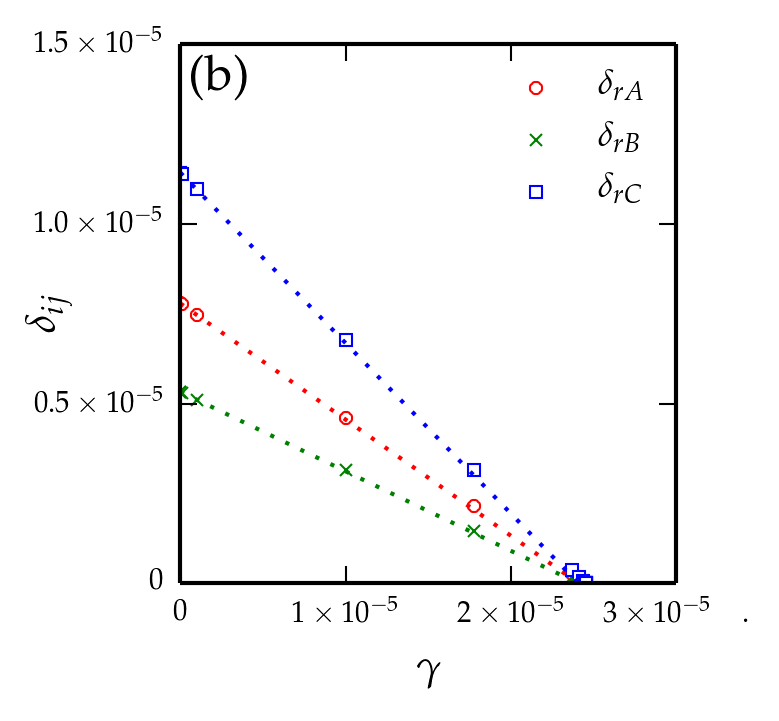

In [57]:
# plot nu de datapunten uit simulatie

from packing_tools import make_shear_graphs as msg
from packing_tools import V_harm

halffig()

ax = plt.gca()

subset = packing_data_array[packing_data_array['gamma'] <= data["gamma_min"]]

print 'gamma from QS:', data['gamma_min']
targetgamma = 0.5*(data["gamma_min"] + data["gamma_plus"])

i = 2
ms = 3 
colors = "rgb"
markers = "oxs"
letters = "ABC"

for step in subset:
    group = packing_data.SR.__getattr__('%04i' % step['step#'])
    packing = dict((x, group._v_attrs[x]) for x in group._v_attrs._v_attrnames)
    packing['particles'] = group.particles.read()
    
    cts = V_harm.get_contacts(packing)
    
    for color,marker,j in zip(colors, markers, [4,8,15]):
        ax.plot(step['gamma'], cts['dij'][i,j], mec=color, marker=marker, color='white', ms=ms)

# add LR curves
x = np.load(r"E:\PhD rearrangements\auto\linres_upps\N22~P1468e-5\8002.npy")
u_par = x[tuple()]['u_par']

group = packing_data.SR.__getattr__('0000')
packing = dict((x, group._v_attrs[x]) for x in group._v_attrs._v_attrnames)
packing['particles'] = group.particles.read()

cts = V_harm.get_contacts(packing)

lrgammas = []

for color,j in zip(colors, [4,8,15]):
    # get initial overlap
    gammas = linspace(0, 3e-5)
    deltas = cts['dij'][i,j] + 0.5 * u_par[i,j] * gammas
    plot(gammas, deltas, color=color, linestyle=":")
    
    lrgamma = (cts['dij'][i,j]/(0.5 * u_par[i,j]))
    lrgammas.append(lrgamma)
    print 'gamma from LR (%i,%i):'%(i,j), lrgamma

lrgammas = np.array(lrgammas)
meanlrgamma = np.mean(lrgamma)
print 'mean lr gamma: ', meanlrgamma
print 'largest relative deviation: %e' % (np.max(abs(lrgammas - meanlrgamma))/meanlrgamma)
        
ax.set_xlim(0, 0.00003)
ax.set_xticks([0, 0.00001, 0.00002, 0.00003])
ax.set_xticklabels([0, r"$1\times 10^{-5}$", r"$2\times 10^{-5}$",
                    r"$3\times 10^{-5}\quad.$"], fontsize='x-small')
ax.get_xticklabels()[-1].set_x(0.00002)
ax.set_xlabel(r"$\gamma$")


ax.set_ylim(0, 0.000015)
ax.set_yticks([0, 0.000005, 0.000010, 0.000015])
ax.set_yticklabels([0, r"$0.5\times 10^{-5}$", r"$1.0\times 10^{-5}$", r"$1.5\times 10^{-5}$"], fontsize='x-small')
ax.set_ylabel(r"$\delta_{ij}$", labelpad=-10)

for color,marker,letter in zip(colors,markers,letters):
    ax.plot(-100, -100, mec=color, marker=marker, color='white', ms=ms, label=r'$\delta_{r%s}$' % letter)
    
ax.legend(frameon=False, fontsize='small', numpoints=1)

plt.text(0.02,0.98, r'(b)',
        transform=gca().transAxes,
        verticalalignment='top',
        horizontalalignment='left',
        size='large')

savefig('deltavgamma-lin.pdf')

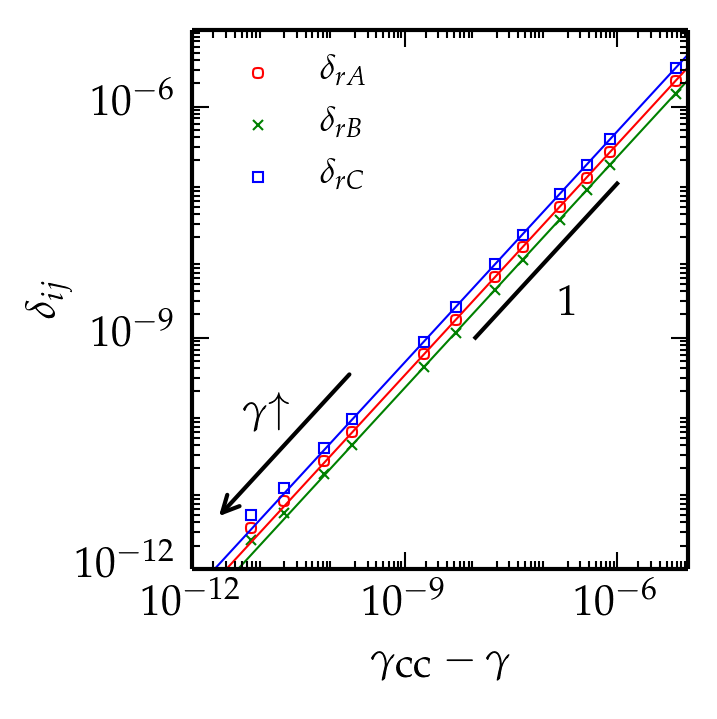

In [184]:
# plot nu de datapunten uit simulatie

from packing_tools import make_shear_graphs as msg
from packing_tools import V_harm

halffig()

ax = plt.gca()

subset = packing_data_array[packing_data_array['gamma'] <= data["gamma_min"]]

targetgamma = 0.5*(data["gamma_min"] + data["gamma_plus"])

i = 2
ms = 2.5
colors = "rgb"
markers = "oxs"
letters = "ABC"

for step in subset:
    group = packing_data.SR.__getattr__('%04i' % step['step#'])
    packing = dict((x, group._v_attrs[x]) for x in group._v_attrs._v_attrnames)
    packing['particles'] = group.particles.read()
    
    cts = V_harm.get_contacts(packing)
    
    for color,marker,j in zip(colors, markers, [4,8,15]):
        ax.plot(targetgamma-step['gamma'], cts['dij'][i,j], mec=color, marker=marker, color='white', ms=ms)

# add linres curves
x = np.load(r"E:\PhD rearrangements\auto\linres_upps\N22~P1468e-5\8002.npy")
u_par = x[tuple()]['u_par']

group = packing_data.SR.__getattr__('0000')
packing = dict((x, group._v_attrs[x]) for x in group._v_attrs._v_attrnames)
packing['particles'] = group.particles.read()

cts = V_harm.get_contacts(packing)

for color,j in zip(colors, [4,8,15]):
    # get initial overlap
    dgammas = logspace(-13, -4)
    plot(dgammas, -dgammas * 0.5 * u_par[i,j], color=color, lw=0.5)
    #gammas = linspace(0,targetgamma,100)
    #dgammas = targetgamma - gammas
    #deltas = cts['dij'][i,j] + 0.5 * u_par[i,j] * gammas
    #plot(dgammas, deltas, color=color, linestyle=":")
        
ax.set_xscale('log')
ax.set_xlim(1e-12, 1e-5)
ax.set_xticks([1e-12, 1e-9, 1e-6])
#ax.set_xlim(0, 0.00003)
#ax.set_xticks([0, 0.00001, 0.00002, 0.00003])
#ax.set_xticklabels([0, r"$1\times 10^{-5}$", r"$2\times 10^{-5}$", r"$3\times 10^{-5}$"], fontsize='x-small')
ax.set_xlabel(r"$\gamma_\textrm{cc} - \gamma$")

ax.set_yscale('log')
ax.set_ylim(1e-12, 1e-5)
ax.set_yticks([1e-12, 1e-9, 1e-6])
#ax.set_yticklabels([0, r"$0.5\times 10^{-5}$", r"$1.0\times 10^{-5}$", r"$1.5\times 10^{-5}$"], fontsize='x-small')
ax.set_ylabel(r"$\delta_{ij}$", labelpad=0)

for color,marker,letter in zip(colors,markers,letters):
    ax.plot(-100, -100, mec=color, marker=marker, color='white', ms=ms, label=r'$\delta_{r%s}$' % letter)
    
ax.legend(frameon=False, fontsize='small', numpoints=1, loc='upper left')

plot([1e-8, 1e-6], [1e-9, 1e-7], color="black")
text(1.5e-7, 0.2e-8, "1")

ax.annotate(r"", xy=(2e-12, 4e-12), xycoords='data',
                xytext=(2e-10, 4e-10), textcoords='data',
                arrowprops=dict(arrowstyle="->", connectionstyle="arc3"),)
ax.text(5e-12, 8e-11, r"$\gamma$")
ax.text(12e-12, 8e-11, r"$\uparrow$")
savefig('deltavgamma-log.pdf')